MathTool HW3
2024-10-29

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from unknown_Systems import unknownSystem1, unknownSystem2, unknownSystem3

# Question 1 a)

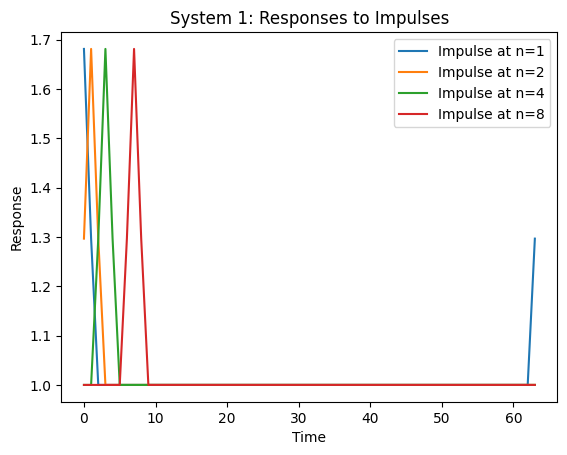

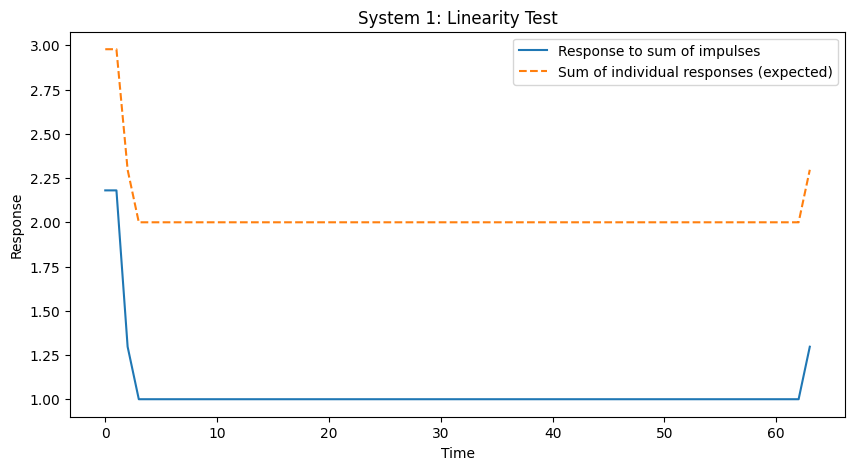

System 1 is NOT consistent with linearity.


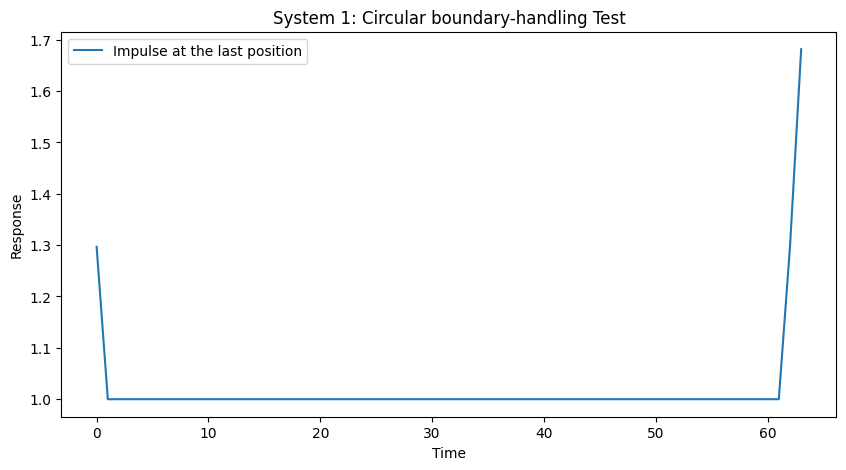

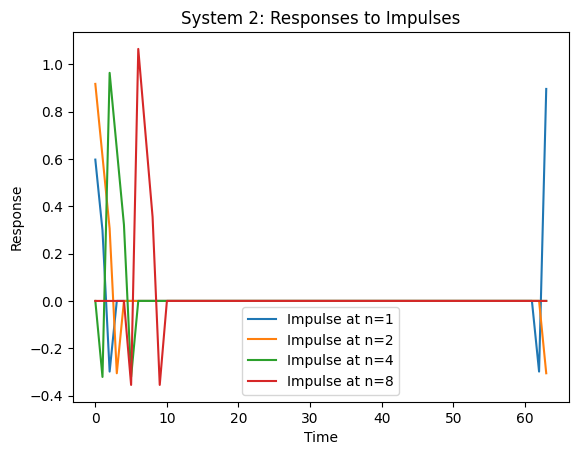

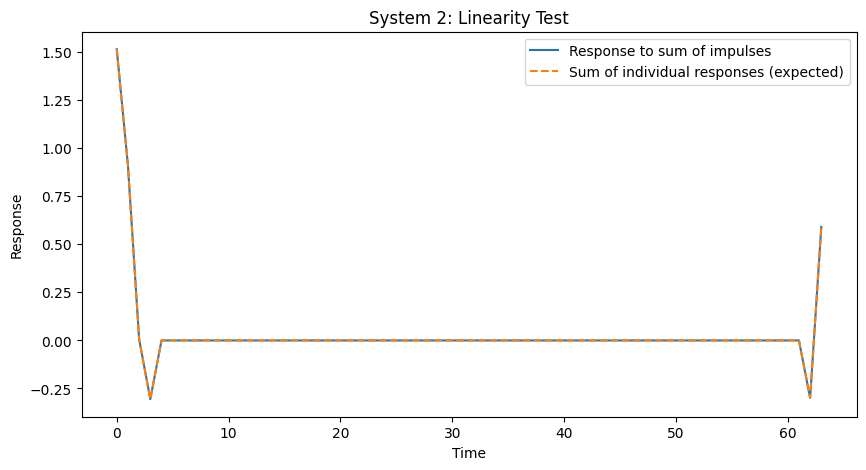

System 2 is consistent with linearity.


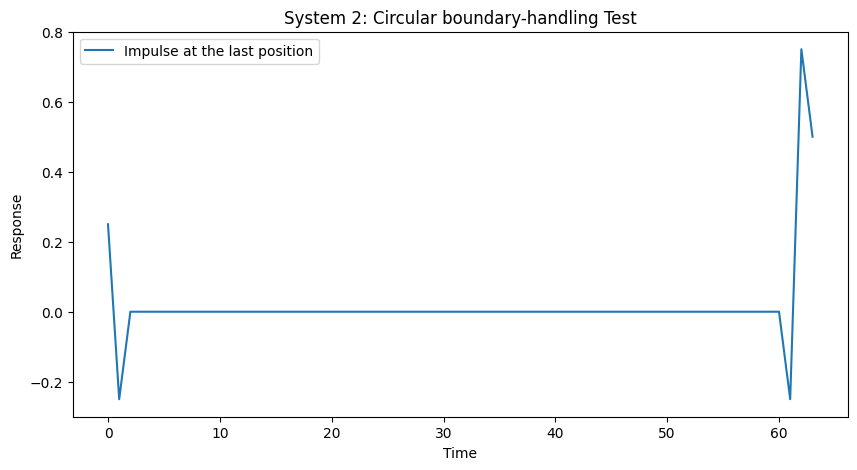

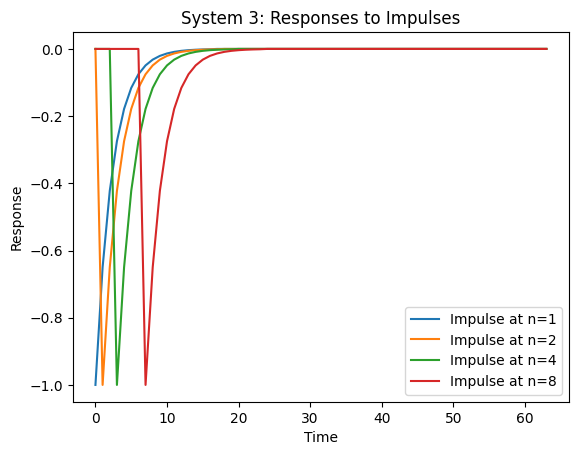

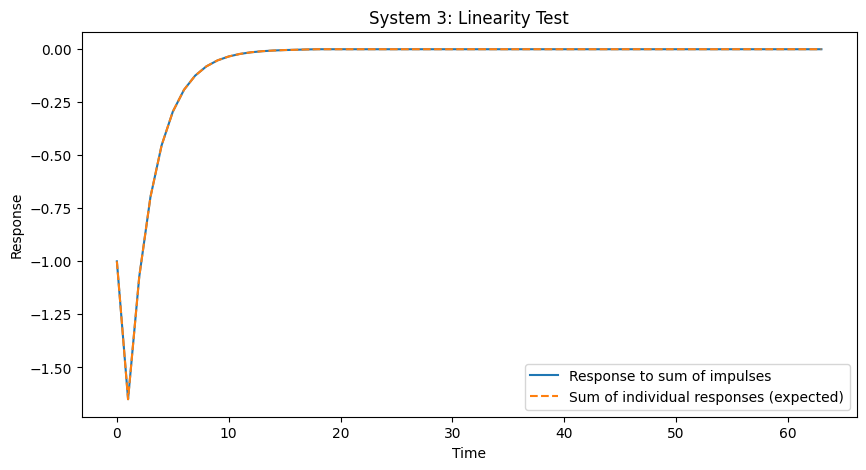

System 3 is consistent with linearity.


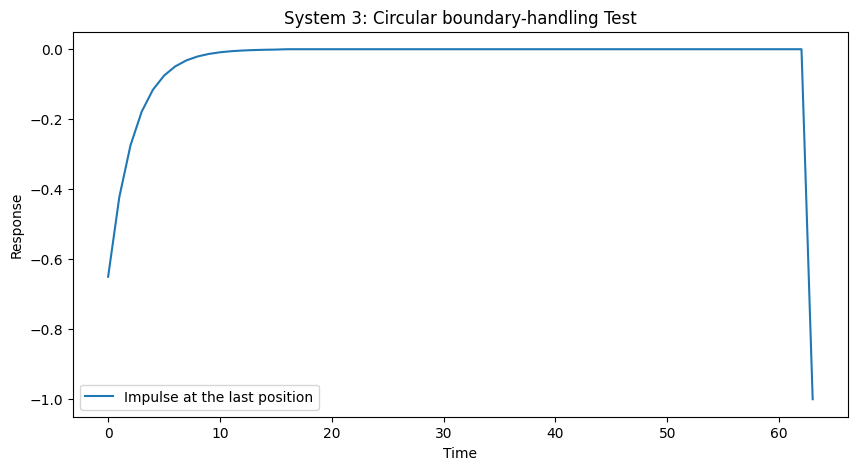

In [121]:

# Generate impulse signal
def create_impulse(length, position):
    impulse = np.zeros(length)
    impulse[position] = 1
    return impulse

#Test the system for shift-invariance and linearity
def test_system(system_func, system_name):
    N = 64 
    positions = [0,1,3,7]

    #Collecting response 
    responses = []
    for pos_idx in positions:
        impulse = create_impulse(N, pos_idx)
        response = system_func(impulse)
        responses.append(response)

        plt.plot(response, label=f'Impulse at n={pos_idx + 1}')
    
    plt.title(f'{system_name}: Responses to Impulses')
    plt.xlabel('Time')
    plt.ylabel('Response')
    plt.legend()
    plt.show()

    # Test linearity
    impulse_sum = create_impulse(N, positions[0]) + create_impulse(N, positions[1])
    response_sum = system_func(impulse_sum)
    expected_sum = responses[0] + responses[1]
    
    # Plot the actual vs expected responses
    plt.figure(figsize=(10, 5))
    plt.plot(response_sum, label='Response to sum of impulses')
    plt.plot(expected_sum, '--', label='Sum of individual responses (expected)')
    plt.title(f'{system_name}: Linearity Test')
    plt.xlabel('Time')
    plt.ylabel('Response')
    plt.legend()
    plt.show()
    
    # Sanity check: whether the responses match for the linearity test
    if np.allclose(response_sum, expected_sum): #check with TA whether this can be used ############################################
        print(f'{system_name} is consistent with linearity.')
    else:
        print(f'{system_name} is NOT consistent with linearity.')

    # Check boundary behavior
    boundary_impulse = create_impulse(N, N-1)  # Impulse at the last position
    boundary_response = system_func(boundary_impulse)
    
    # Plot the boundary behavior
    plt.figure(figsize=(10, 5))
    plt.plot(boundary_response, label='Impulse at the last position')
    plt.title(f'{system_name}: Circular boundary-handling Test')
    plt.xlabel('Time')
    plt.ylabel('Response')
    plt.legend()
    plt.show()

# For each system
test_system(unknownSystem1, "System 1")
test_system(unknownSystem2, "System 2")
test_system(unknownSystem3, "System 3")


In general, I performed three testes to examine the properties of shift-invariance, linearity and circular boundary-handling for all three systems. 

**For System 1:**
1. **In the shift-invariance test**, the responses of System 1 to impulses at different positions (n=1,2,4,8) were consistent in shape, with the output shifting proportionally to the position of the input impulse. This confirms that **<u>System 1 is shift-invariant</u>**, as the system’s response depends solely on the location of the impulse without altering the waveform itself.

2. **In the linearity test**, the system’s response to a combined impulse was equal to the sum of the individual responses to these impulses. This verifies that **<u>System 1 is not linear</u>**, as the the responses for two impulse is not equal to the response for sum of two impulse. 

3. **In the circular-boundary handling test**, when an impulse was placed at the boundary, the response was confined to the end of the output vector and did not convolve to affect the beginning of the output. This suggests that System 1 uses zero-padding or a similar method for handling boundaries, rather than circular boundary handling.



**For System 2:**
1. **In the shift-invariance test**, The responses of System 2 to impulses at different positions showed variations in waveform shape that were not simply shifted versions of each other. This indicates that **<u>System 2 violates shift-invariance</u>**, as the output depends not only on the position of the input impulse but also modifies the response shape in an inconsistent manner.

2. **In the linearity test**, the system’s response to the sum of impulses matched the sum of the individual responses. This confirms that **<u>System 2 is linea</u>r**, as it adheres to the principle of superposition.

3. **In the circular-boundary handling test**, when an impulse was placed at the boundary, it caused the output to wrap around and affect the beginning of the response vector. This indicates that System 2 uses circular boundary handling, demonstrating a  circular convolution.


**For System 3:**
1. **In the shift-invariance test**, the responses of System 3 to impulses at different positions were consistent in shape and only shifted according to the input position. This confirms that **<u>System 3 is shift-invariant</u>**, as the output response remains consistent regardless of where the impulse is located in the input.
2. **In the linearity test**, the response matches the sum of the individual impulse responses. There were mp discrepancies, indicating that **<u>System 3 is linear</u>**.
3. **In the circular-boundary handling test**, an impulse at the boundary of System 3 produced a response that did not wrap around to the beginning of the output vector. This suggests that System 3 employs zero-padding or is not useing circular boundary handling. 

# Question 1 b)

In [122]:
N = 64
input_freqs = [2, 4, 8, 16]  # Input frequencies for sinusoids

In [123]:
def create_positive_sinusoid(length, frequency, phase):
    n = np.arange(length)
    sinusoid = np.sin(frequency * n + phase)
    sinusoid += 1  # Make all elements positive
    return sinusoid

In [124]:
# Testing response of the system to different sinusoidal inputs
def test_frequency_subspace(system_func, system_name):
    print(f"\nFrequency Subspace Analysis for {system_name}:")
    
    for freq in input_freqs:
        #Sinusoid waves
        random_phase = np.random.uniform(0, 2 * np.pi)
        scaled_freq = np.pi * freq / N
        input_signal = create_positive_sinusoid(N, scaled_freq, random_phase)
        
    
        output_signal = system_func(input_signal)
        
        # FFT
        fft_input = np.fft.fft(input_signal)
        fft_output = np.fft.fft(output_signal)
        
        # frequency with maximum amplitudes
        win = np.argmax(np.abs(fft_input))
        wout = np.argmax(np.abs(fft_output))
        
        # Check if the dominant frequency of input matches that of output
        if win == wout:
            print(f"  Output sinusoid at {freq}π/64 lies within the subspace of the input sinusoid.")
        else:
            print(f"  Output sinusoid at {freq}π/64 does NOT match the input sinusoid frequency.")



In [125]:
test_frequency_subspace(unknownSystem1, "System 1")
test_frequency_subspace(unknownSystem2, "System 2")
test_frequency_subspace(unknownSystem3, "System 3")


Frequency Subspace Analysis for System 1:
  Output sinusoid at 2π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 4π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 8π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 16π/64 lies within the subspace of the input sinusoid.

Frequency Subspace Analysis for System 2:
  Output sinusoid at 2π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 4π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 8π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 16π/64 lies within the subspace of the input sinusoid.

Frequency Subspace Analysis for System 3:
  Output sinusoid at 2π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 4π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 8π/64 lies within the subspace of the input sinusoid.
  Output sinusoid at 16π/64 lies within the 

# Question 1 c）

In [126]:
def get_impulse_response(system_func):
    impulse = np.zeros(N)
    impulse[0] = 1  # Impulse at the first position
    return system_func(impulse)

In [127]:
def verify_amplitude_phase(system_func, system_name):
    print(f"\nAmplitude and Phase Analysis for {system_name}:")
    
    impulse_response = get_impulse_response(system_func)
    r_tilde = np.fft.fft(impulse_response)  # FFT of impulse response
    
    n = np.arange(N)
    
    for freq in input_freqs:
        f = np.pi * freq * n / N
        
        #input sinusoids and cosoids
        input_sinusoid = np.sin(f)
        input_cosoid = np.cos(f)
        
        #output after passing through the system
        output_sinusoid = system_func(input_sinusoid)
        
        #dot products with the impulse response
        cr = np.dot(impulse_response, input_cosoid)
        sr = np.dot(impulse_response, input_sinusoid)
        
        #get the amplitude and phase of the signal
        Ar = np.sqrt(cr**2 + sr**2)  #amplitude
        phase = np.arctan2(sr, cr)  
        
        #frequency index for r_tilde
        freq_index = freq // 2 
        
        # Compare amplitude and phase with the Fourier Transform of the impulse response
        amplitude_match = abs(Ar - np.abs(r_tilde[freq_index])) <= 0.01
        phase_match = abs(phase - np.angle(r_tilde[freq_index])) <= 0.01
        
        # Output results
        if amplitude_match:
            print(f"  Amplitude of sinusoid at {freq}π/64 matches the FFT of impulse response.")
        else:
            print(f"  Amplitude of sinusoid at {freq}π/64 does NOT match the FFT of impulse response.")
        
        if phase_match:
            print(f"  Phase of sinusoid at {freq}π/64 matches the FFT of impulse response.")
        else:
            print(f"  Phase of sinusoid at {freq}π/64 does NOT match the FFT of impulse response.")

verify_amplitude_phase(unknownSystem1, "System 1")
verify_amplitude_phase(unknownSystem2, "System 2")
verify_amplitude_phase(unknownSystem3, "System 3")


Amplitude and Phase Analysis for System 1:
  Amplitude of sinusoid at 2π/64 matches the FFT of impulse response.
  Phase of sinusoid at 2π/64 matches the FFT of impulse response.
  Amplitude of sinusoid at 4π/64 matches the FFT of impulse response.
  Phase of sinusoid at 4π/64 matches the FFT of impulse response.
  Amplitude of sinusoid at 8π/64 matches the FFT of impulse response.
  Phase of sinusoid at 8π/64 matches the FFT of impulse response.
  Amplitude of sinusoid at 16π/64 matches the FFT of impulse response.
  Phase of sinusoid at 16π/64 matches the FFT of impulse response.

Amplitude and Phase Analysis for System 2:
  Amplitude of sinusoid at 2π/64 matches the FFT of impulse response.
  Phase of sinusoid at 2π/64 does NOT match the FFT of impulse response.
  Amplitude of sinusoid at 4π/64 matches the FFT of impulse response.
  Phase of sinusoid at 4π/64 does NOT match the FFT of impulse response.
  Amplitude of sinusoid at 8π/64 matches the FFT of impulse response.
  Phase of

**For both system 1 and system 2**, both linearity and shift-invariance appear to be violated in System 1. The system does not maintain consistent behavior in terms of scaling (linearity) or phase shift (shift-invariance) across the tested frequencies. **For system 3**, it demonstrates LSI behavior at some frequencies (0.10, 0.2 and 0.79) but violates it at others (0.20 and 0.39). This partial consistency suggests that System 3 might be partially linear and shift-invariant, but not over the entire frequency spectrum.

In my testes, for Systems 1 and 2, the tests guarantee that the systems are not LSI. But for system 3, the tests showes that the system is partial consistency with LSI behavior. However, since discrepancies exist at specific frequencies, the test is not guaranting the LSI.

For possible tests that can guarantee LSI, here are some possible tests that coudl work:
1. Impulse Response Test, since it tests the system’s response to impulses at different positions to check for shift-invariance. It can also test the system’s response to a combination of impulses to verify linearity.
2. White Noise Test, by applying white noise to observe if the system outputs a consistent power spectral density that aligns with its frequency response.



In [600]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## (a)

In [601]:
#Initializing parameters
sigma1 = 1.5
sigma2 = 3.5
n = np.linspace(-7, 7, 15)

In [602]:
# #Generate the Gaussian function
# def gaussian(n, sigma):
#     return np.exp(-n**2 / (2 * sigma**2))

# #Generate Gaussians that's centered around 0
# x = np.arange(length) - center
# gaussian1 = gaussian(x, sigma1) #sd=1.5
# gaussian2 = gaussian(x, sigma2) #sd=3.5
# #Normalizing
# gaussian1 /= np.sum(gaussian1)
# gaussian2 /= np.sum(gaussian2)

In [603]:
# Create the two Gaussians
gaussian1 = np.exp(-n**2 / (2 * sigma1**2))
gaussian2 = np.exp(-n**2 / (2 * sigma2**2))

gaussian1 /= np.sum(gaussian1)
gaussian2 /= np.sum(gaussian2)

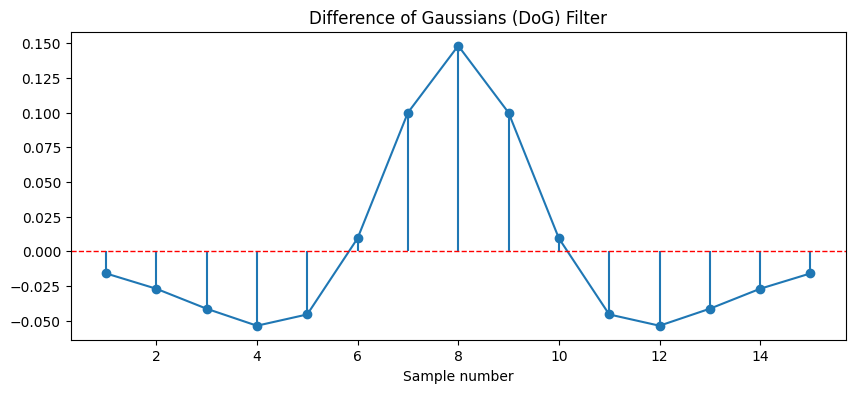

In [604]:
# Difference of Gaussians (DoG)
dog_filter = gaussian1 - gaussian2

# Plot the DoG filter
plt.figure(figsize=(10, 4))
plt.plot(n + 8, dog_filter)
plt.stem(n + 8, dog_filter, basefmt=" ")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Sample number')
plt.title('Difference of Gaussians (DoG) Filter')
plt.show()

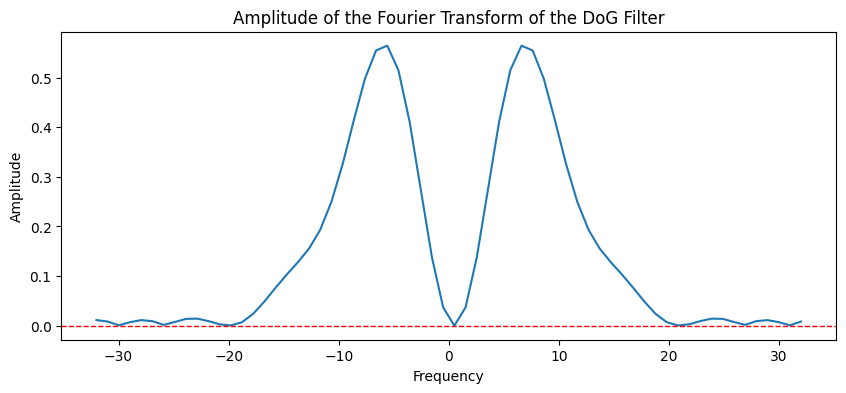

In [605]:
#Doing Fourier transform to the filter, sampled at 64 locations 
N = 64
freq_range = np.linspace(-N/2, N/2, N)

fft_dog = np.fft.fftshift(np.fft.fft(dog_filter, N))
fft_dog_amplitude = np.abs(fft_dog)

# Plot the amplitude of the Fourier transform
plt.figure(figsize=(10, 4))
plt.plot(freq_range, fft_dog_amplitude)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Amplitude of the Fourier Transform of the DoG Filter")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

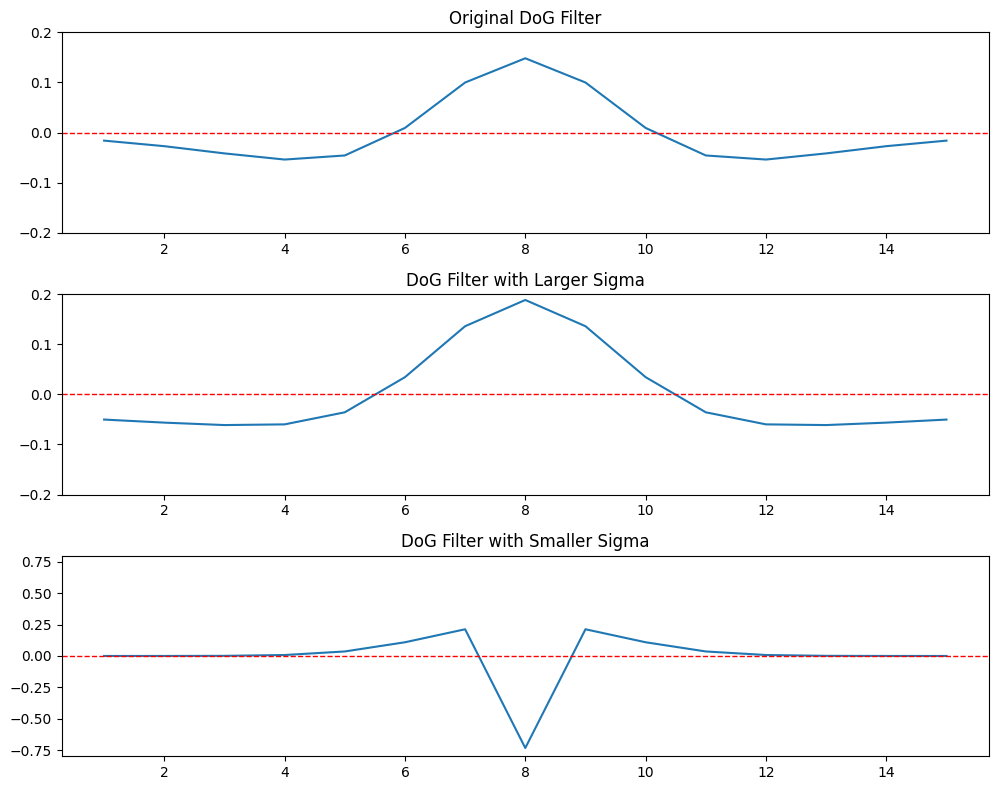

In [606]:
# Playing around 
sigma_values = [(sigma1, sigma2, 'Original DoG Filter', [-0.2, 0.2]), 
                (sigma1, 7.5, 'DoG Filter with Larger Sigma', [-0.2, 0.2]),
                (sigma1, 0.1, 'DoG Filter with Smaller Sigma', [-0.8, 0.8])]

plt.figure(figsize=(10, 8))
for i, (sigma1_val, sigma2_val, title, ylim) in enumerate(sigma_values, start=1):
    gaussian1 = np.exp(-n**2 / (2 * sigma1_val**2))
    gaussian2 = np.exp(-n**2 / (2 * sigma2_val**2))
    gaussian1 /= np.sum(gaussian1)  
    gaussian2 /= np.sum(gaussian2)  
    dog_variant = gaussian1 - gaussian2

    plt.subplot(3, 1, i)
    plt.plot(n + 8, dog_variant)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.ylim(ylim)
    plt.title(title)

plt.tight_layout()
plt.show()

The DoG filter acts as a band-pass filter. It only allow certain frequency in a specific range to pass through and prunning very low and high frequencies. 

The shape is determined by the standard deviation of the two choosen Gaussians. For the Gaussian with smaller sd, it forms a narrow, central peak; for the Gaussian with larger sd, it forms a broader shape. When we subtract them, the central peak remains as the difference, while the surrounding areas become negative, forming a characteristic center-surround structure. This structure reflects spatial contrast, similar to how retinal and LGN neurons respond to light patterns.

If change sd for smaller Gaussian: increasing it will increase the width of the central peak, making the filter more sensitive to lower frequencies, the ampliotude of the Fourier transform at lower frequencies increases, and the filter becomes broader. If decrease it, the filter will become more sensitive to higher frequencier, shifting the energy in the Fourier domain to higher frequencies. 
If change sd for bigger Gaussian: increasing it broadens the inhibitory region, and will lower the energy in mid-range frequencies, as the inhibitory part cancels out more of the excitatory peak. Where as decreasing the sd will make the inhibitory surround smaller and will increase the mid-range frequency components in the Fourier transform.

## (b)

In [607]:
#FFT of the DoG filter
N = 64

freq_range = np.linspace(0, N / 2 - 1, N // 2)
freq_range_half = freq_range / 2

fft_dog = np.fft.fftshift(np.fft.fft(dog_filter, N))
fft_dog_amplitude = np.abs(fft_dog)
fft_dog_amplitude_half = fft_dog_amplitude[N//2:]

# Maximum amplitude
max_amplitude = np.max(fft_dog_amplitude_half)
max_amplitude_index = np.argmax(fft_dog_amplitude_half)

max_frequency = freq_range[max_amplitude_index]
max_period = N / max_frequency

In [608]:
print(f"The frequency with the largest response at {max_amplitude_index} term, and  is: {max_frequency:.2f} cycles/sample")

#Period
print(f"The period of this sinusoid is: {max_period:.2f} samples")

The frequency with the largest response at 6 term, and  is: 6.00 cycles/sample
The period of this sinusoid is: 10.67 samples


In [609]:
#25% of the maximum amplitude
target_25_amplitude = max_amplitude* 0.25
threshold = np.abs(fft_dog_amplitude_half - target_25_amplitude)
closest_indices = np.argsort(threshold)[:2]
freq_25_1_index, freq_25_2_index = freq_range[closest_indices]

In [610]:
print(f"Frequencies with approximately 25% of the maximum amplitude sinusoids at frequency of {freq_25_1_index:.2f} and {freq_25_2_index:.2f} Hz.")

Frequencies with approximately 25% of the maximum amplitude sinusoids at frequency of 2.00 and 14.00 Hz.


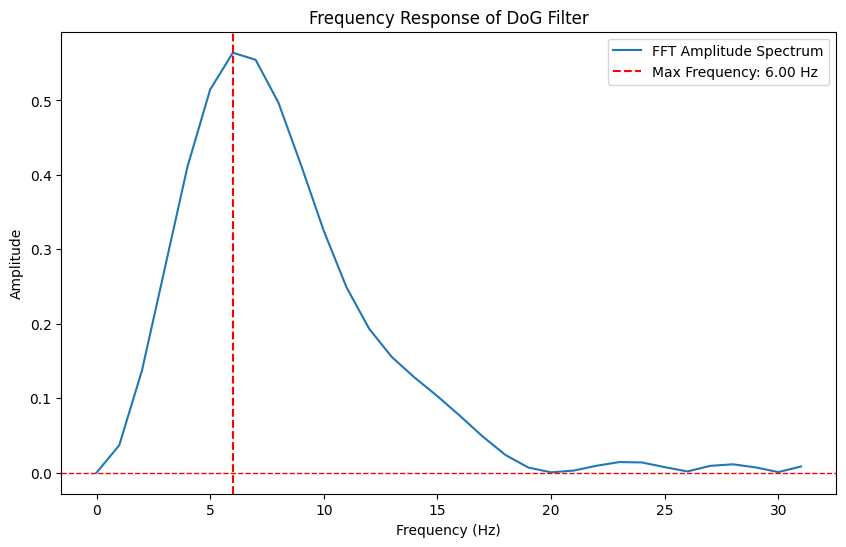

In [611]:
plt.figure(figsize=(10, 6))
plt.plot(freq_range, fft_dog_amplitude_half, label='FFT Amplitude Spectrum')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axvline(max_frequency, color='r', linestyle='--', label=f'Max Frequency: {max_frequency:.2f} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Frequency Response of DoG Filter')
plt.show()

It's the same shape as the DoG filter.

(-1.0, 1.0)

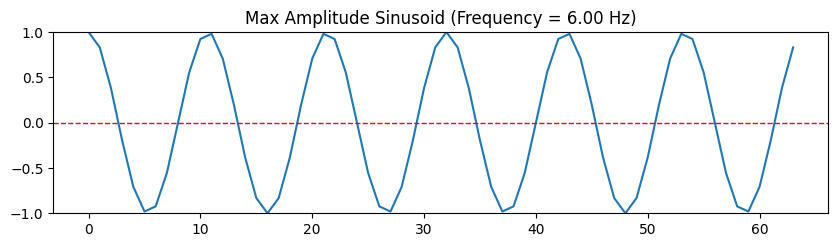

In [612]:
n = np.arange(N)
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(np.cos(2 * np.pi * n * max_frequency / N))
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title(f'Max Amplitude Sinusoid (Frequency = {max_frequency:.2f} Hz)')
plt.ylim([-1, 1])

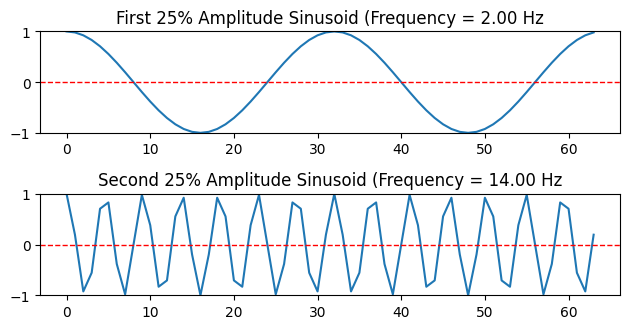

In [613]:
plt.subplot(3, 1, 2)
plt.plot(np.cos(2 * np.pi * n * freq_25_1_index / N))
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title(f'First 25% Amplitude Sinusoid (Frequency = {freq_25_1_index:.2f} Hz')
plt.ylim([-1, 1])

plt.subplot(3, 1, 3)
plt.plot(np.cos(2 * np.pi * n * freq_25_2_index / N))
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title(f'Second 25% Amplitude Sinusoid (Frequency = {freq_25_2_index:.2f} Hz')
plt.ylim([-1, 1])

plt.tight_layout()
plt.show()

## (c)

In [614]:
N_qc = 64
n_qc = np.arange(N_qc)
frequencies = [2, 6, 14] 

sinusoids = [np.cos(2 * np.pi * freq * n_qc / N_qc) for freq in frequencies]

In [615]:
#Convolution with DoG filter
responses = [np.convolve(sinusoid, dog_filter, mode='same') for sinusoid in sinusoids]

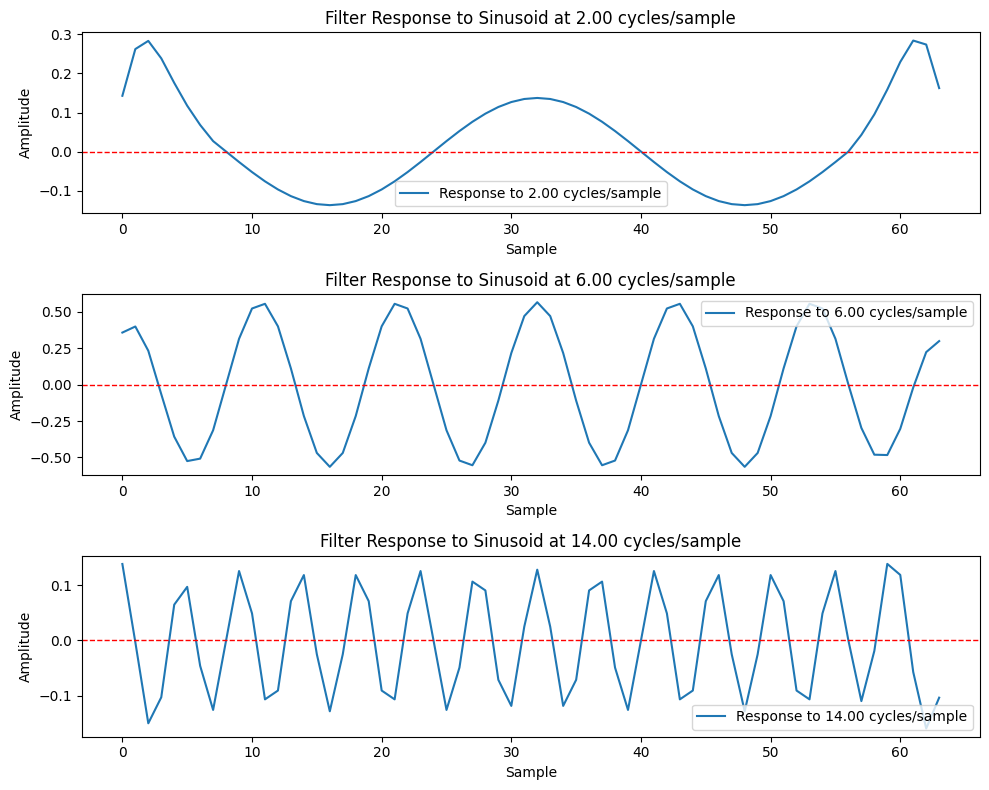

In [616]:
plt.figure(figsize=(10, 8))
for i, (sinusoid, response) in enumerate(zip(sinusoids, responses)): #enumerate(zip()) is adding index and pairing the two inputs
    plt.subplot(3, 1, i + 1)
    plt.plot(response, label=f'Response to {frequencies[i]:.2f} cycles/sample')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.title(f'Filter Response to Sinusoid at {frequencies[i]:.2f} cycles/sample')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
plt.tight_layout()
plt.show()

In [617]:
amplitudes_at_max_c = []

# fourier transform to each response
for i, response in enumerate(responses):
    fft_response = np.fft.fftshift(np.fft.fft(response, N_qc))  
    fft_amplitude = np.abs(fft_response)
    amplitude_at_max_c = np.max(fft_amplitude) 
    amplitudes_at_max_c.append(amplitude_at_max_c)
    print(f'Amplitude of response at {frequencies[i]:.2f} cycles/sample: {amplitude_at_max_c:.4f}')


ratio1 = amplitudes_at_max_c[0] / amplitudes_at_max_c[1]  # low/medium
ratio2 = amplitudes_at_max_c[2] / amplitudes_at_max_c[1]  # high/medium

print(f'The ratios of the amplitudes are {ratio1:.2f} for low/medium and {ratio2:.2f} for high/medium frequencies.')
print('And these ratios are close to 25% of the amplitude in previous question.')


Amplitude of response at 2.00 cycles/sample: 5.3207
Amplitude of response at 6.00 cycles/sample: 17.3723
Amplitude of response at 14.00 cycles/sample: 4.1368
The ratios of the amplitudes are 0.31 for low/medium and 0.24 for high/medium frequencies.
And these ratios are close to 25% of the amplitude in previous question.


## (d)

In [618]:
N = 64 
n = np.arange(N)
frequencies = [2, 6, 14]

sinusoids = [np.cos(2 * np.pi * freq * n / N) for freq in frequencies]
fft_dog = np.fft.fft(dog_filter, n=N)

In [619]:
# Circular convolution
def convolve_same_length(a, b):
    if len(a) < len(b):
        a, b = b, a
    # Circularly pad `a` on both sides
    a_padded = np.concatenate([a[-(len(b) - 1):], a, a[:(len(b) - 1)]])
    c = np.zeros(len(a))
    for k in range(len(a)):
        c[k] = np.dot(a_padded[k: k + len(b)], b[::-1])
    return c

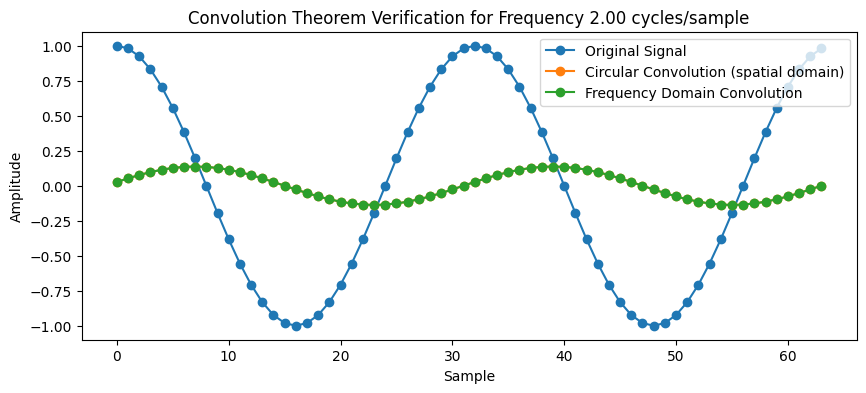

Signal 1 (Frequency 2.00 cycles/sample):
Imaginary part is zero? True
Real part matches spatial convolution? True



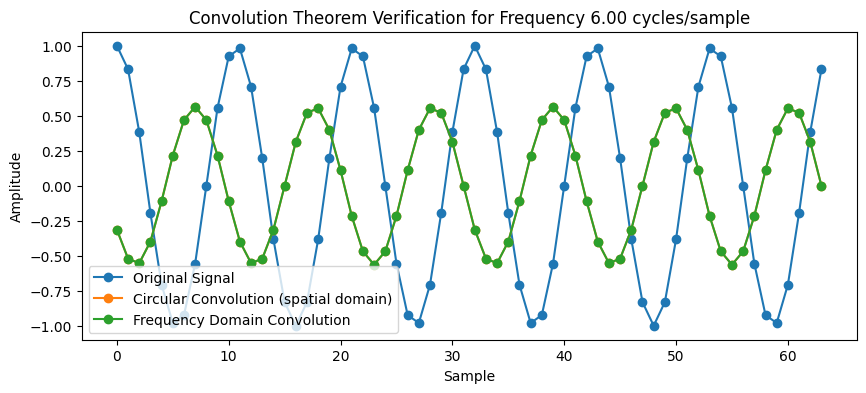

Signal 2 (Frequency 6.00 cycles/sample):
Imaginary part is zero? True
Real part matches spatial convolution? True



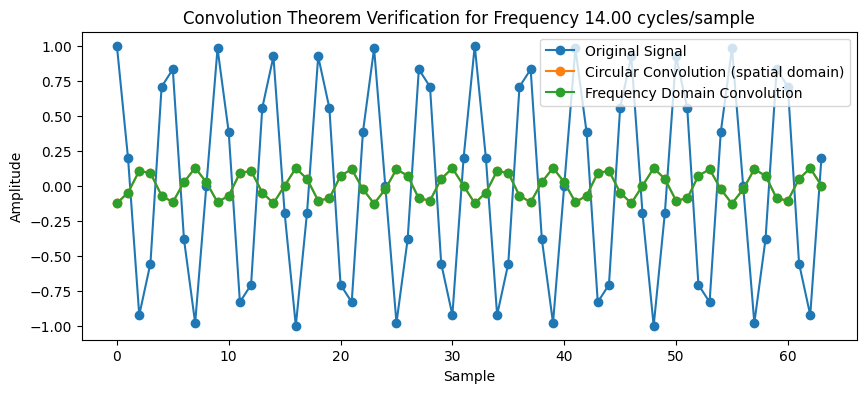

Signal 3 (Frequency 14.00 cycles/sample):
Imaginary part is zero? True
Real part matches spatial convolution? True

For the results of the inverse Fourier transform, the imaginary parts are zeros, and the real parts are the same as the results of the convolution.


In [620]:
# Verifying the convolution theorem for each sinusoidal signal
for i, sinusoid in enumerate(sinusoids):
    # Circular convolution (spatial domain)
    circular_convolution = convolve_same_length(sinusoid, dog_filter)

    # fft to sinusoidal signal
    fft_signal = np.fft.fft(sinusoid, n=N)

    # inverse fft to get into the frequency domain
    fft_product = fft_signal * fft_dog
    freq_convolution = np.fft.ifft(fft_product)

    # Verify if imaginary part is zero and if real part matches spatial convolution
    imag_check = np.allclose(freq_convolution.imag, 0, atol=1e-4)
    real_check = np.allclose(np.round(freq_convolution.real, 4), np.round(circular_convolution, 4))

    plt.figure(figsize=(10, 4))
    plt.plot(sinusoid, "-o", label="Original Signal")
    plt.plot(circular_convolution, "-o", label="Circular Convolution (spatial domain)")
    plt.plot(freq_convolution.real, "-o", label="Frequency Domain Convolution")
    plt.title(f"Convolution Theorem Verification for Frequency {frequencies[i]:.2f} cycles/sample")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

    print(f"Signal {i+1} (Frequency {frequencies[i]:.2f} cycles/sample):")
    print(f"Imaginary part is zero? {imag_check}")
    print(f"Real part matches spatial convolution? {real_check}\n")

print("For the results of the inverse Fourier transform, the imaginary parts are zeros, and the real parts are the same as the results of the convolution.")


**MathTools HW3** 
2024-10-21

Question 3

In [1685]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io

In [1686]:
data = scipy.io.loadmat('hrfDeconv.mat')
r = data.get('r').flatten()
x = data.get('x').flatten()

time = range(len(x))
r_new = r[:len(x)]

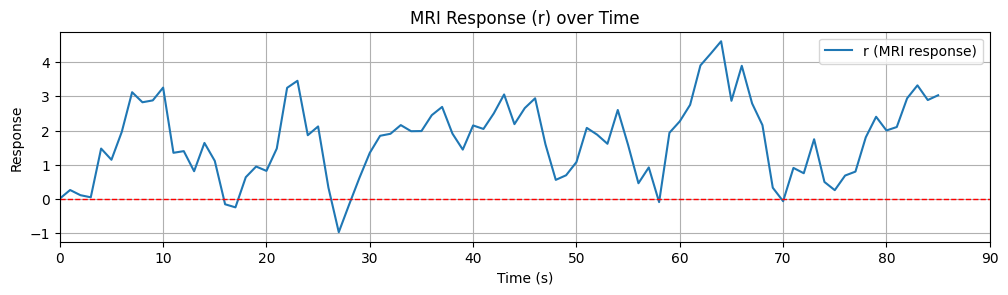

In [1687]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, r_new, label='r (MRI response)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlim(0, 90)
plt.title('MRI Response (r) over Time')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid(True)

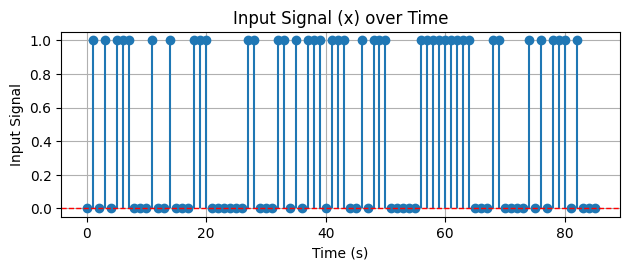

In [1688]:
plt.subplot(2, 1, 2)
plt.stem(time, x, basefmt=" ")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Input Signal (x) over Time')
plt.xlabel('Time (s)')
plt.ylabel('Input Signal')
plt.grid(True)

plt.tight_layout()
plt.show()

(a)

In [1689]:
# Define the function, create a convolution matrix X for an input vector x and filter length M.
def createConvMat(x, M):
    N = len(x)
    
    # Empty place holder
    X = np.zeros((N + M - 1, M))

    for i in range(M):
        X[i:i+N, i] = x

    return X

In [1690]:
# Testing the convolution matrix
#x = np.random.rand(50)
M = 15
X = createConvMat(x , M)

In [1691]:
# Testing with random h vector
h = np.random.rand(M)

# Manually calculated convolution
N_holder = len(X)
r_calculated = [0] * N_holder
for i in range(N_holder):
    for j in range(M):
        r_calculated[i] += X[i][j] * h[j]
# Python built in matrix multiplication operator: @; np.dot(); np.matmul()
#r_calculated = X @ h

r_python = np.convolve(x, h, mode='full')  #python numpy built in convolution


In [1692]:
print("Check if the two responses are almost equal:", np.allclose(r_calculated, r_python))

Check if the two responses are almost equal: True


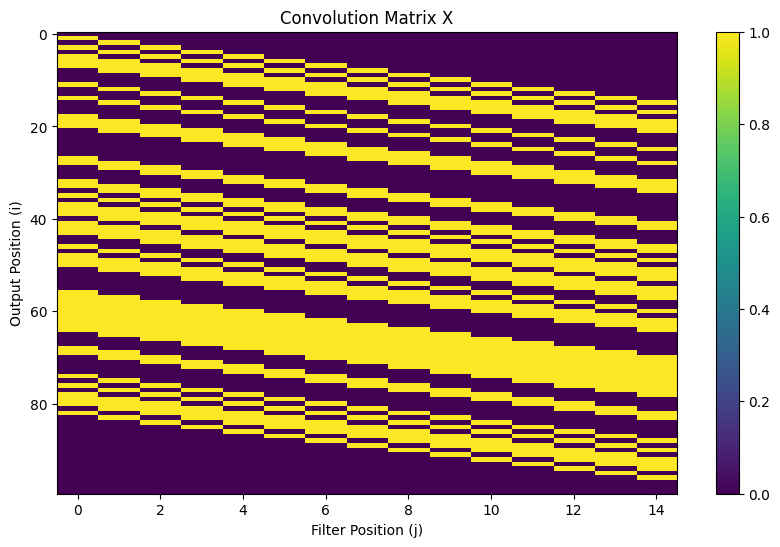

In [1693]:
plt.figure(figsize=(10, 6))
plt.imshow(X, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Convolution Matrix X')
plt.xlabel('Filter Position (j)')
plt.ylabel('Output Position (i)')
plt.show()

In this image, each row contains shifted values of the input vector 𝑥. This structure illustrates how the input signal (a series of impulses over time) is transformed to create the delayed MRI response 𝑟.


(b)

In [1694]:
# Manually calculating transpose
def transpose_matrix(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    transposed = [[0] * rows for _ in range(cols)] #since only cares about number of rows to create the same column
    for i in range(rows):
        for j in range(cols):
            transposed[j][i] = matrix[i][j]
    return transposed

In [1695]:
# Manually calculating matrices multiplication
def multiply_matrices(A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    assert cols_A == rows_B, "Error"

    result = [[0] * cols_B for _ in range(rows_A)]
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A): #necessary, since k is accumulating the total sum of all elements in accordance
                result[i][j] += A[i][k] * B[k][j]    
    return result

In [1696]:
# Manually calculating inverse matrix
def inverse_matrix(matrix):
    n = len(matrix)                     
    identity_matrix = [[float(i == j) for i in range(n)] for j in range(n)] #float is for deciding whether it's a diagonal element based on the output, 1 for yes and 0 for no; and using inner layer and outer layer to avoid too many for loops
    copy = [matrix[i] + identity_matrix[i] for i in range(n)]

    #Gauss-Jordan elimination
    for i in range(n):
        coef = copy[i][i]
        for j in range(2 * n):
            copy[i][j] /= coef
        
        for k in range(n):
            if k != i:
                coef = copy[k][i]
                for j in range(2 * n):
                    copy[k][j] -= coef * copy[i][j]

    inverse = [row[n:] for row in copy]
    return inverse

In [1697]:
# Manually multiplying a matrix with a vector
def multiply_matrix_vector(matrix, vector):
    rows = len(matrix)
    cols = len(matrix[0])

    assert cols == len(vector), "Error"

    result = [0] * rows
    for i in range(rows):
        for j in range(cols):
            result[i] += matrix[i][j] * vector[j]
    return result

In [1698]:
# Solving the least-squares regression problem MANUALLY
def leastSquares_calculated(X, r):

    #Step 1: X-transpose
    X_transpose = transpose_matrix(X)

    #Step 2: matrices mutiplications of X-transpose and X
    XT_X = multiply_matrices(X_transpose, X)

    #Step 3: MANUALLY CALCULATING INVERSE IN PYTHON (which is the cruelest thing that I've ever been through) of step 2
    XT_X_inv = inverse_matrix(XT_X)

    # Step 4: X-transpose * r
    XT_r = multiply_matrix_vector(X_transpose, r)

    # Step 5: h_opt = (X^T * X)^-1 * (X^T * r)
    h_opt_calculated_test = multiply_matrix_vector(XT_X_inv, XT_r)
    
    return h_opt_calculated_test


In [1699]:
# svd to calculate least square, manually
U, Sigma, VT = np.linalg.svd(X, full_matrices=False)
Sigma_pinv = np.diag(1 / Sigma)

#r = r[:len(X)].reshape(-1, 1)
h_opt_calculated = VT.T @ Sigma_pinv @ U.T @ r


In [1700]:
h_opt_calculated_test = leastSquares_calculated(X, r_calculated)
print("Check if two ways of calculating least square are equal:", np.allclose(h_opt_calculated, h_opt_calculated_test))

Check if two ways of calculating least square are equal: False


In [1701]:
## Sanity check sections ##
# Solving the least-squares regression problem with all build in functions
def leastSquares_python(X, r):
    X_transpose_python = np.transpose(X)
    h_opt_python = np.linalg.inv(X_transpose_python @ X) @ (X_transpose_python @ r)
    return h_opt_python

In [1702]:
#h_opt_calculated = leastSquares_calculated(X, r_calculated)
h_opt_python = leastSquares_python(X, r)
h_opt_calculated = h_opt_calculated.flatten()

In [1703]:
print("Check if the two responses are almost equal:", np.allclose(h_opt_calculated, h_opt_python))

Check if the two responses are almost equal: True


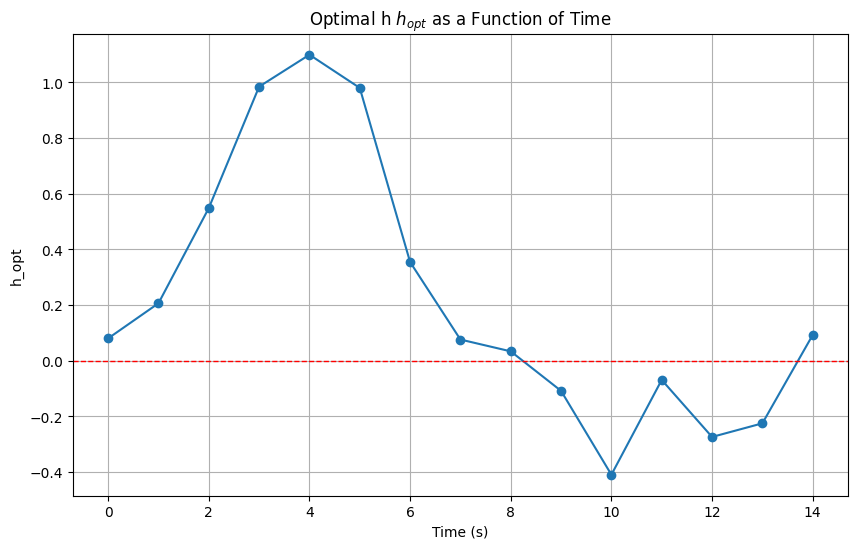

In [1704]:
#Plotting
time_h = np.arange(len(h_opt_calculated))

plt.figure(figsize=(10, 6))
plt.plot(time_h, h_opt_calculated, marker='o')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Optimal h $h_{opt}$ as a Function of Time")
plt.xlabel("Time (s)")
plt.ylabel("h_opt")
plt.grid(True)
plt.show()

The plot of $h_{opt}$ as a function of time represents a temporal response of an impulse response. From the graph we can see that it's fluctuating. 
And it's lating for 14s. 

(c)

In [1705]:
# FFT to HRF
h_opt_calculated = np.array(h_opt_calculated)
H = np.fft.fft(h_opt_calculated)

In [1706]:
# Get the power spectrum
power_spectrum = np.abs(H) ** 2
# Shiifting the zero-value to center
power_spectrum_shifted = np.fft.fftshift(power_spectrum)

In [1707]:
# Get the frequency
nn = len(h_opt_calculated)
freuency = np.fft.fftfreq(nn) #sampling rate is at 1hz
freq_shifted = np.fft.fftshift(freuency)

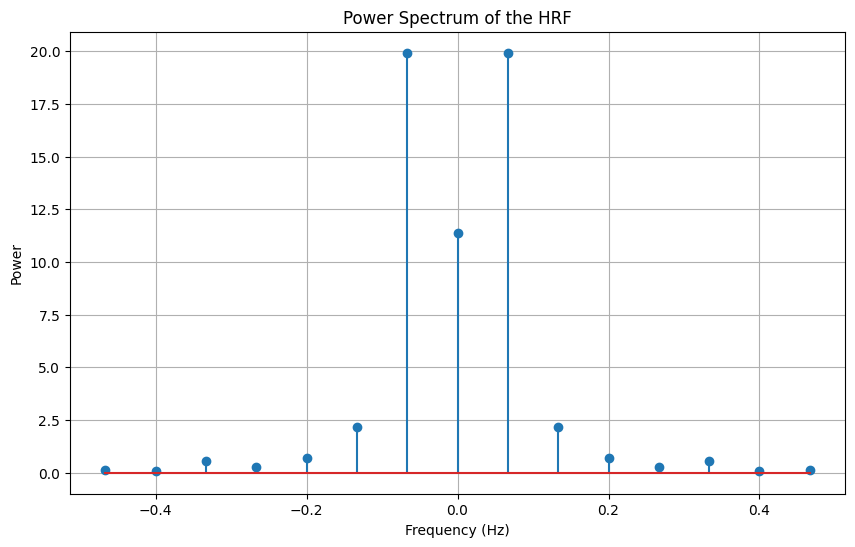

In [1708]:
plt.figure(figsize=(10, 6))
plt.stem(freq_shifted, power_spectrum_shifted)
plt.title('Power Spectrum of the HRF')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True)
plt.show()

Based on th plot, we can tell that the HRF is a low-pass filter, allowing low frequencies (including the DC component) to pass through. I think it make sense, since HRD is corresponding to slow and sustained changes, such as blood flow changes in response to neural activities. 

(d)

In [1709]:
# Convolution theorem in fourier domain
# The Convolution Theorem states that the convolution of two signals in the time domain is equivalent to multiplying their Fourier transforms in the frequency domain. 
r_questiond = np.array(r_calculated)
maxlength = max(len(x), len(r_questiond)) 
x_pad = np.pad(x, (0, maxlength - len(x)), 'constant')
r_pad = np.pad(r, (0, maxlength - len(X)), 'constant')

x_fft = np.fft.fft(x_pad)
r_questiond_fft = np.fft.fft(r_pad)

In [1710]:
# Calculate the fourier transform of $h_{opt}$ in fourier domain
h_questiond_fft = r_questiond_fft / x_fft

# In time domain
h_questiond_fft_recovered = np.fft.ifft(h_questiond_fft)[:M].real 


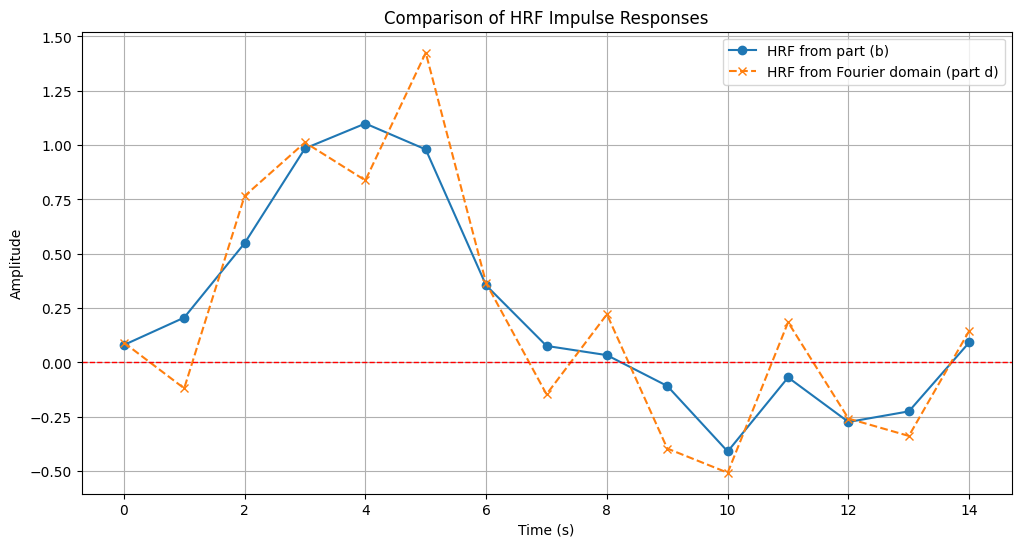

In [1712]:
#Plotting (b) and (d)
time_questiond = np.arange(len(h_questiond_fft_recovered))

plt.figure(figsize=(12, 6))
plt.plot(time_questiond, h_opt_calculated, '-o', label='HRF from part (b)')
plt.plot(time_questiond, h_questiond_fft_recovered, '--x', label='HRF from Fourier domain (part d)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Comparison of HRF Impulse Responses')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

From the graph, after zero-padding, I can tell that the Convolution theorem in fourier domain is providing a only-okay approximation of the HRF, providing a similar tendency.

However, this method would fail if the input signal x has zero values at any frequency. Or, if the input and response signal have too high noise level, which will get amplified during the division step. 

**MathTools HW3** 
2024-10-25

Question 4

(a)

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io

In [206]:
# Create a 128-sample signal g_{0}
N = 128
x = np.arange(N)
frequencies = [3, 13, 60] 
amplitudes = [0.2, 0.3, 1.0]

g0 = (amplitudes[0] * np.sin(2 * np.pi * frequencies[0] * x / N) +
      amplitudes[1] * np.sin(2 * np.pi * frequencies[1] * x / N) +
      amplitudes[2] * np.sin(2 * np.pi * frequencies[2] * x / N))

In [207]:
# Subsample
gs = g0[::2]

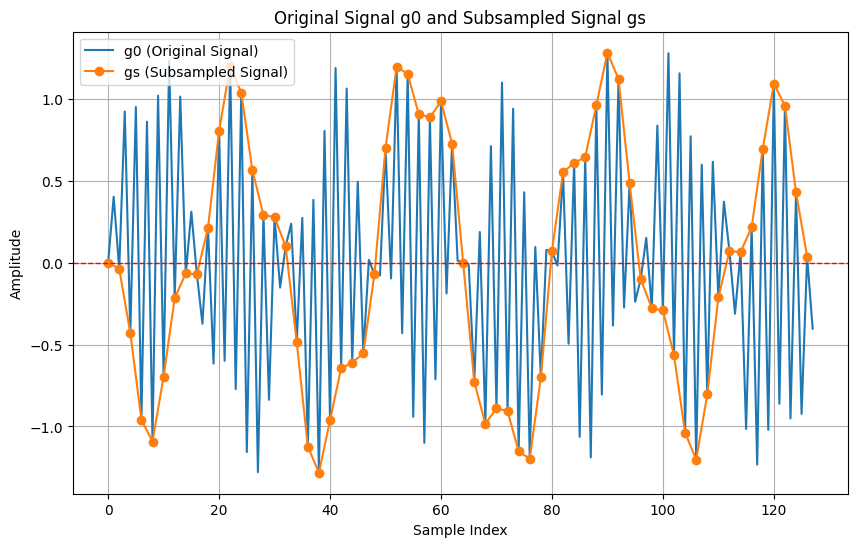

In [208]:
plt.figure(figsize=(10, 6))
plt.plot(x, g0, label='g0 (Original Signal)')
plt.plot(x[::2], gs, label='gs (Subsampled Signal)', marker='o')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Original Signal g0 and Subsampled Signal gs')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

(b)

In [209]:
def downsample(signal):
    kernel = np.array([1/16, 1/4, 3/8, 1/4, 1/16])

    convolved = np.convolve(signal, kernel, mode='same')
    downsample_result = convolved[::2]

    return downsample_result

In [210]:
g1 = downsample(g0)

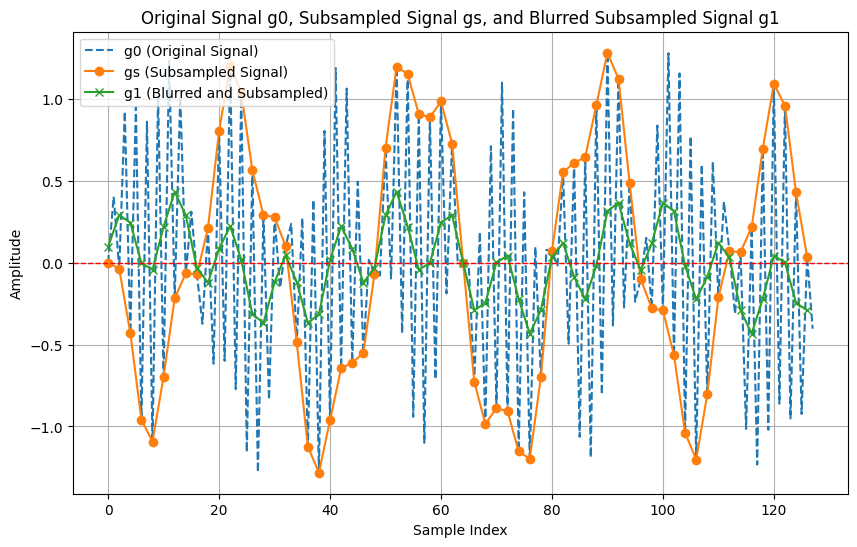

In [211]:
plt.figure(figsize=(10, 6))
plt.plot(x, g0, linestyle='--', label='g0 (Original Signal)')
plt.plot(x[::2], gs, label='gs (Subsampled Signal)', marker='o')
plt.plot(x[::2], g1, label='g1 (Blurred and Subsampled)', marker='x')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Original Signal g0, Subsampled Signal gs, and Blurred Subsampled Signal g1')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

(c)

In [212]:
# Up sampling
def upSample(signal):
    #first adds samples with value zero between every sample of gi (plus an extra one at the end)
    add_zero = np.zeros(len(signal)*2)
    add_zero[::2] = signal
    # You will need to multiply all the values of the kernel by 2 to yield an up-sampled signal with approximately the same values as you started with.
    kernal_c = np.array([1/16, 1/4, 3/8, 1/4, 1/16]) * 2

    # Convolution
    upSample_blurred = np.convolve(add_zero, kernal_c, mode='same')
    return upSample_blurred

In [213]:
upSampled_g1 = upSample(g1)

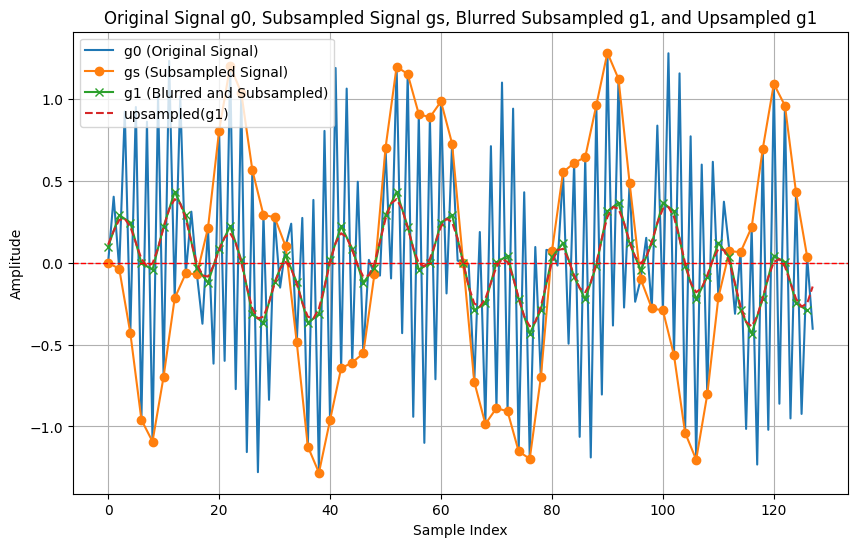

In [214]:
plt.figure(figsize=(10, 6))
plt.plot(x, g0, label='g0 (Original Signal)')
plt.plot(x[::2], gs, label='gs (Subsampled Signal)', marker='o')
plt.plot(x[::2], g1, label='g1 (Blurred and Subsampled)', marker='x')
plt.plot(x, upSampled_g1, label='upsampled(g1)', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Original Signal g0, Subsampled Signal gs, Blurred Subsampled g1, and Upsampled g1')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

The up-sampled signal has been smoother and has the approximate shape of the original signal but has been prunned with high-frequency details that is lost during downsampling in previous question.
These differences is because of the procedure called aliasing. Aliasing happens when high frequencies in the original signal appear as lower frequencies in the downsampled signal.

(d)

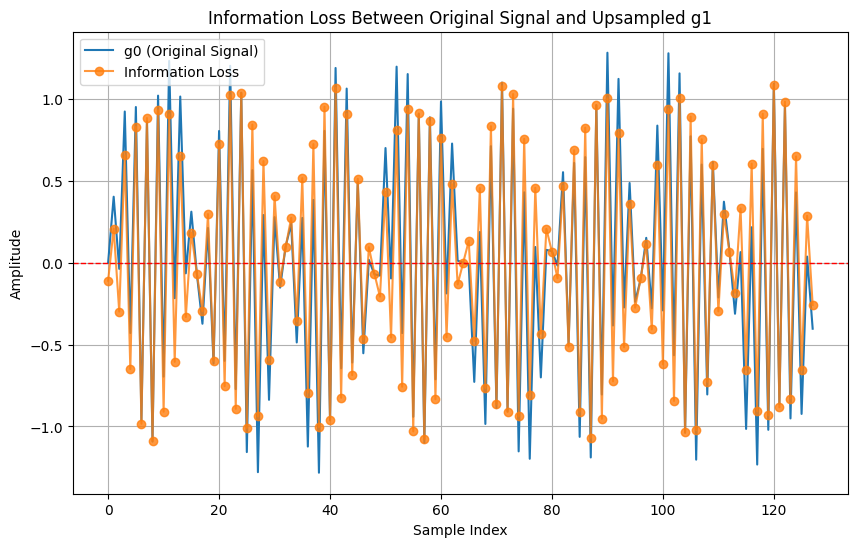

In [215]:
l0 = g0 - upSampled_g1 

# Plotting the result
plt.figure(figsize=(10, 6))
plt.plot(x, g0, label='g0 (Original Signal)')
plt.plot(x, l0, label='Information Loss', marker='o', alpha = 0.8)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Information Loss Between Original Signal and Upsampled g1')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()



This is showing the information loss of high-frequency when downsampling g0 to create g1 and then upsampling back.

(e)

In [216]:
iterates = 5
gaussian_pyramid = [g0]
laplacian_pyramid = []

In [217]:
for i in range(iterates):
    gi = gaussian_pyramid[-1]
    gi_next = downsample(gi)
    gaussian_pyramid.append(gi_next)

    #li = gi - upSample(gi+1)
    upSampled_gi_next = upSample(gi_next)
    li = gi - upSampled_gi_next[:len(gi)]
    laplacian_pyramid.append(li)

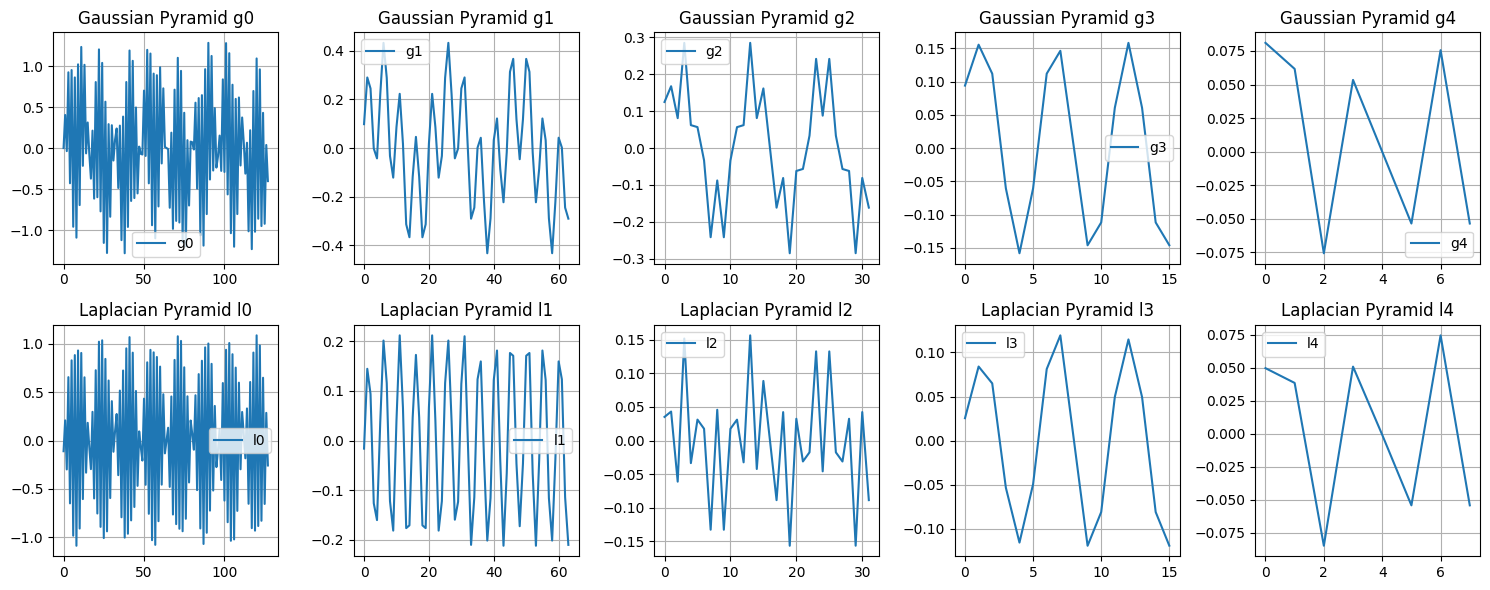

In [218]:
fig, axs = plt.subplots(2, iterates, figsize=(15, 6))

for i in range(iterates):
    axs[0, i].plot(gaussian_pyramid[i], label=f'g{i}')
    axs[0, i].set_title(f'Gaussian Pyramid g{i}')
    axs[0, i].legend()
    axs[0, i].grid(True)

    axs[1, i].plot(laplacian_pyramid[i], label=f'l{i}')
    axs[1, i].set_title(f'Laplacian Pyramid l{i}')
    axs[1, i].legend()
    axs[1, i].grid(True)

plt.tight_layout()
plt.show()

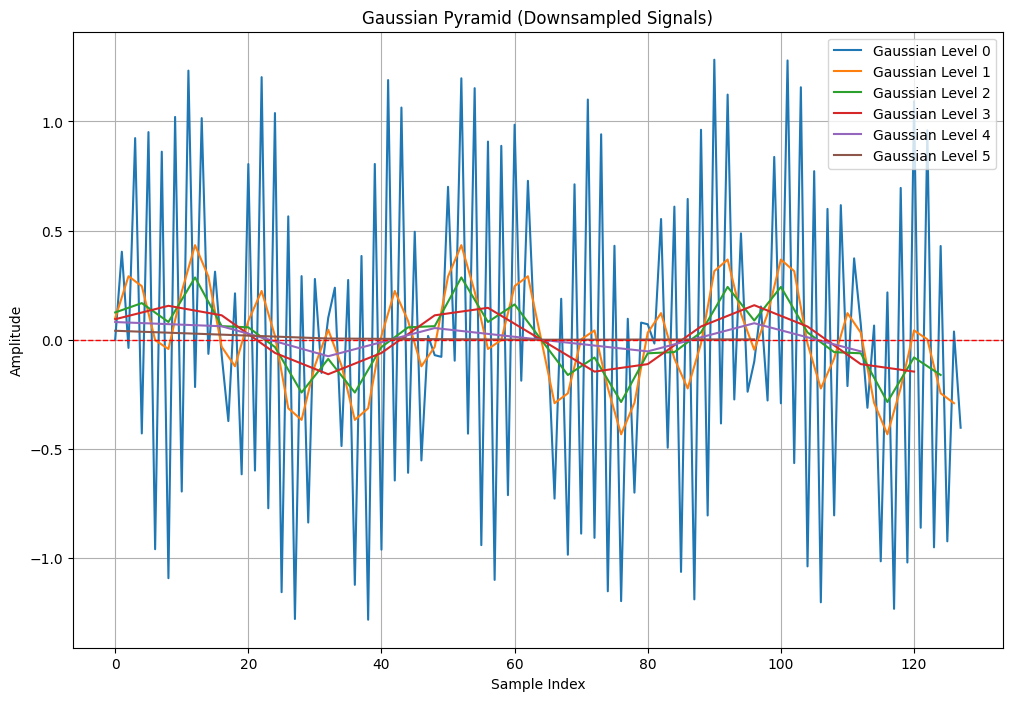

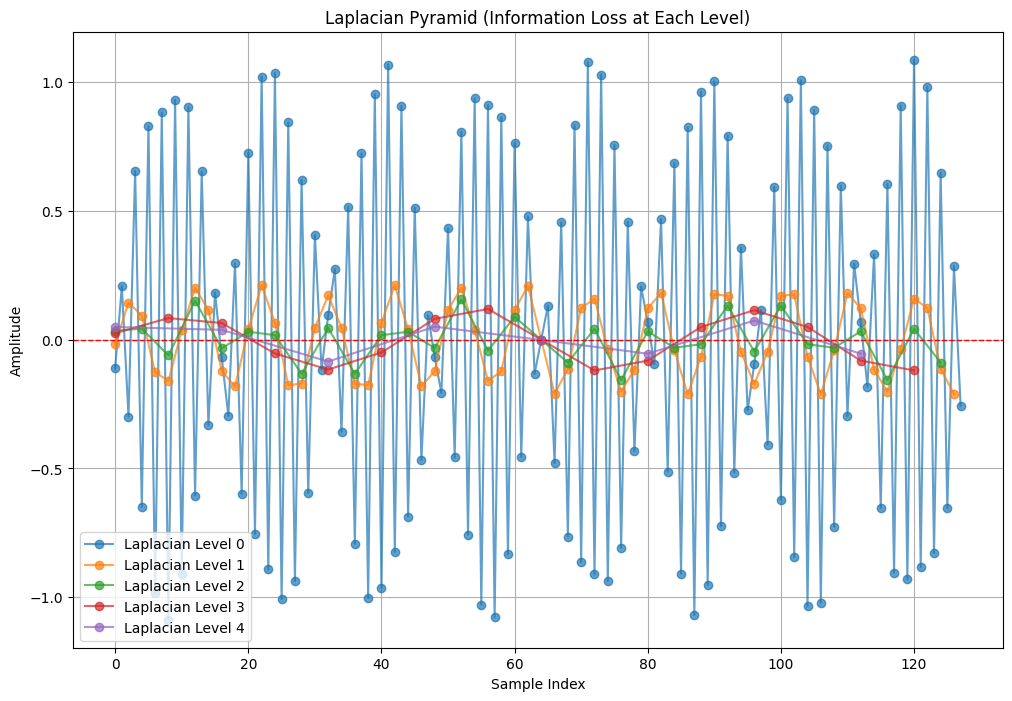

In [219]:
# Plotting on the same graph
# Plot the Gaussian Pyramid
plt.figure(figsize=(12, 8))
for i, gi in enumerate(gaussian_pyramid):
    plt.plot(np.arange(len(gi)) * (2**i), gi, label=f'Gaussian Level {i}')

plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Gaussian Pyramid (Downsampled Signals)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Plot the Laplacian Pyramid
plt.figure(figsize=(12, 8))
for i, li in enumerate(laplacian_pyramid):
    plt.plot(np.arange(len(li)) * (2**i), li, label=f'Laplacian Level {i}', marker='o', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Laplacian Pyramid (Information Loss at Each Level)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

(f)

In [220]:
iterates = 5
gaussian_pyramid = [g0]

for i in range(iterates):
    gi = gaussian_pyramid[-1]
    gi_next = downsample(gi)
    gaussian_pyramid.append(gi_next)

In [221]:
#Tracing back to original
target_length=128
def upsample_to_original(signal,target_length):
    while len(signal) < target_length:
        signal = upSample(signal)
    return signal[:target_length] 

In [222]:
upsampled_gaussian_pyramid = [upsample_to_original(gi,target_length) for gi in gaussian_pyramid]

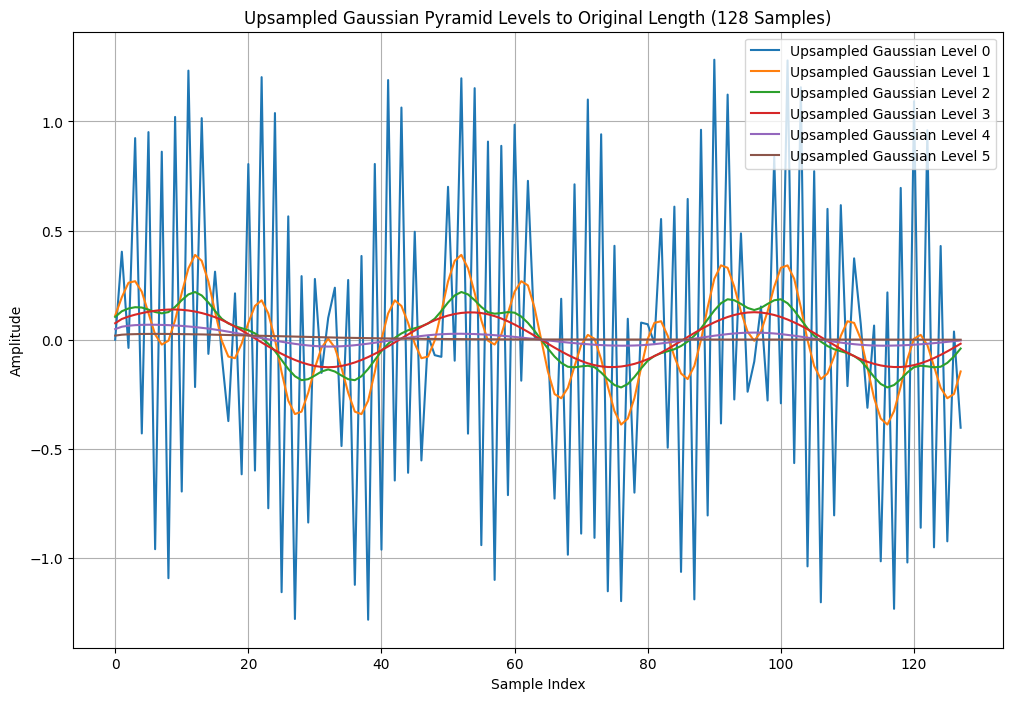

In [223]:
plt.figure(figsize=(12, 8))
for i, upsampled_gi in enumerate(upsampled_gaussian_pyramid):
    plt.plot(np.arange(128), upsampled_gi, label=f'Upsampled Gaussian Level {i}')
plt.title('Upsampled Gaussian Pyramid Levels to Original Length (128 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

The upsampling of each Gaussian pyramid back to the original length shows that the lower levels retain more detail, including high frequencie, and each level is losing progressively more detail.

(g)

In [224]:
target_length=128
laplacian_pyramid_upsampled = [upsample_to_original(li,target_length) for li in laplacian_pyramid]
upsampled_g5 = upsample_to_original(gaussian_pyramid[-1], target_length)

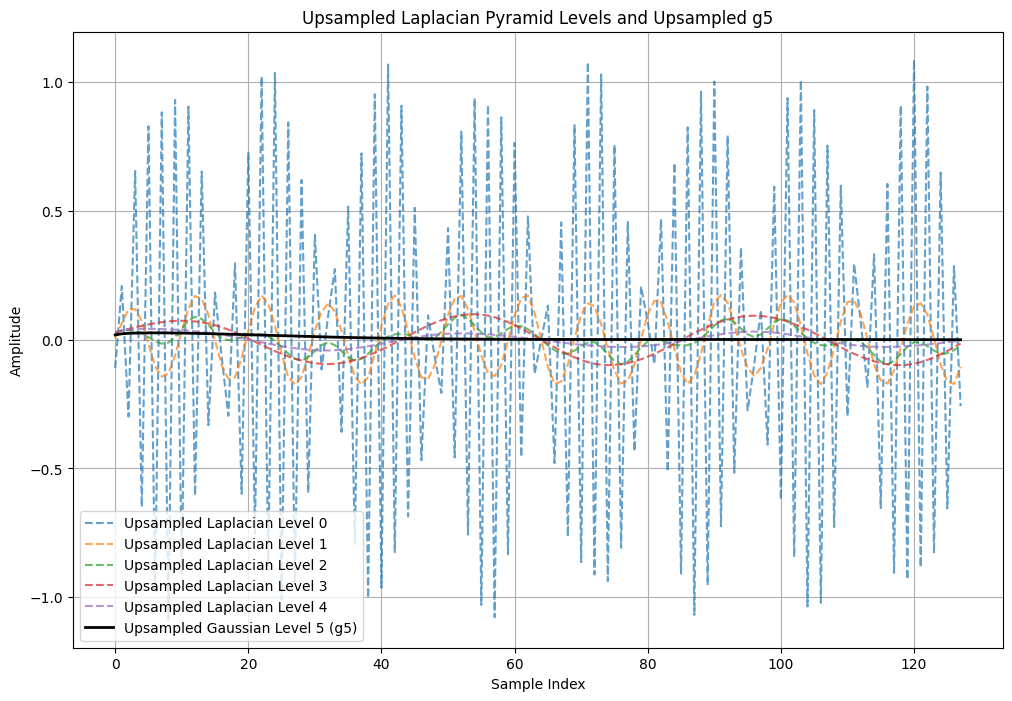

In [225]:
plt.figure(figsize=(12, 8))
for i, upsampled_li in enumerate(laplacian_pyramid_upsampled):
    plt.plot(np.arange(128), upsampled_li, label=f'Upsampled Laplacian Level {i}', linestyle='--', alpha=0.7)
plt.plot(np.arange(128), upsampled_g5, label='Upsampled Gaussian Level 5 (g5)', color='black', linewidth=2)
plt.title('Upsampled Laplacian Pyramid Levels and Upsampled g5')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In this graph, we can see that Level 0 has the largest amplitude because it captures the finest details and highest frequencies from the original signal. As moving to higher Laplacian levels (Levels 1 to 4), the amplitude decreases, indicating that these levels capture progressively lower-frequency details.
For level 5, the black line represents the broadest, lowest-frequency structure of the original signal. It's the lowest frequency details since it retains only the overall trend of the signal without any fine details since it's been downsampled too many times.  

(h)

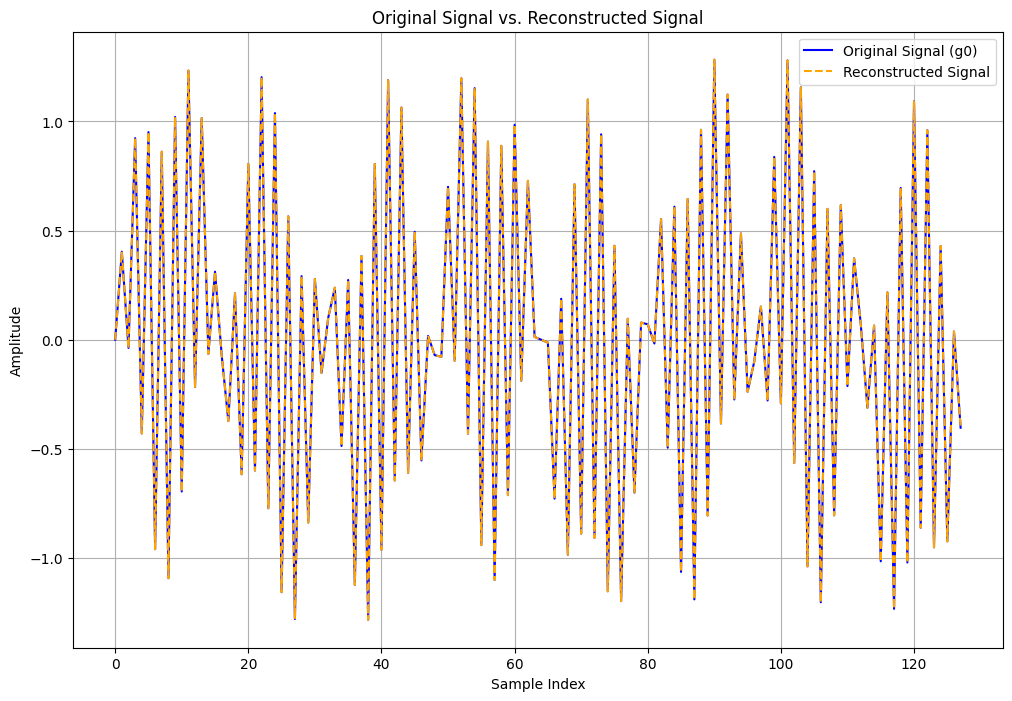

In [226]:
reconstructed_signal = upsampled_g5.copy()
for upsampled_li in laplacian_pyramid_upsampled:
    reconstructed_signal += upsampled_li

plt.figure(figsize=(12, 8))
plt.plot(np.arange(128), g0, label='Original Signal (g0)', color='blue')
plt.plot(np.arange(128), reconstructed_signal, label='Reconstructed Signal', linestyle='--', color='orange')
plt.title('Original Signal vs. Reconstructed Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

The constructed signal is closely matched to the original signal g0. Since Laplacian pyramid levels capture the high-frequency details lost during downsampling, while the Gaussian pyramid’s final level captures the lowest-frequency, broad structure of the signal. Thus, the Gaussian and Laplacian pyramids together retain all the information needed to rebuild the original signal.